## ПРОГНОЗИРОВАНИЕ ЦЕНЫ Bitcoin
__Набор данных, который мы будем использовать здесь для выполнения анализа и построения прогностической модели, представляет собой данные о цене биткоина.__
__Данные взяты с биржи Binance.__

## Постановка задачи
__Рассмотрим задачу нахождения зависимости цены Bitcoin от полученных признаков. И так же прогнозирование цены на основании признаков.__

## Формирование исходных данных

__Получаем api ключи на бирже Binance__

In [97]:
api_key = 'f3y94gPfSQ1yuP2IwYSinwUkT6dmlQXUQWSzzMoAnhR9nzlQ5EAyzT0OILUK3qU1'
api_secret = 'pFVk1jkt8hTjlPKSiBoOKgOAz3IybdYgqhmMskeagAZqqmVFDuYeB7AxkJFanMxs'

__Подключаем библиотеки__

In [98]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import mplfinance as mpf
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import warnings
warnings.filterwarnings('ignore')

## Данные по паре btcusdt

In [99]:
client = Client(api_key, api_secret)

__Берём данные с начиная 1 октября 2020 года с интервалом в 1 день__

In [100]:
histor = client.get_historical_klines('BTCUSDT',Client.KLINE_INTERVAL_1DAY, '1 oct 2020')

In [101]:
btcusdt_df = pd.DataFrame(histor, columns=['Open_time','Open','High','Low','Close','Volume','Close_time',
                              'Quote_asset_volume','Number_of_trades','Taker_buy_base_asset_volume',
                              'Taker_buy_quote_asset_volume','Ignore'])

In [102]:
btcusdt_df.head()

,Open_time,Open,High,Low,Close,Volume,Close_time,Quote_asset_volume,Number_of_trades,Taker_buy_base_asset_volume,Taker_buy_quote_asset_volume,Ignore
0,1601510400000,10776.59000000,10920.00000000,10437.00000000,10619.13000000,60866.33289300,1601596799999,652168989.46173484,794855,28449.97510300,304779535.38197477,0
1,1601596800000,10619.13000000,10664.64000000,10374.00000000,10570.40000000,50130.39370500,1601683199999,526864379.30936534,777193,24123.90254500,253507685.50358702,0
2,1601683200000,10570.40000000,10603.56000000,10496.46000000,10542.06000000,22298.22134100,1601769599999,235160884.60853616,381329,10752.46288200,113392722.76217199,0
3,1601769600000,10542.07000000,10696.87000000,10517.87000000,10666.63000000,23212.00159500,1601855999999,246252050.90681072,377553,12123.27565000,128619845.13152086,0
4,1601856000000,10666.62000000,10798.00000000,10615.64000000,10792.21000000,34025.76165300,1601942399999,364158510.23798056,483340,15551.58438700,166457546.86846151,0


__Записываем в CSV файл__

In [103]:
btcusdt_df.to_csv('btcusdt_df.csv') 

In [104]:
#btcusdt_df = pd.read_csv('btcusdt_df.csv', index_col=0) # Загрузка сохранённого файла.

## Описание признаков

-  __Open__ — цена открытия торгов, то есть цена первой сделки;
-  __High__ — самая высокая цена сделки в течение торговой сессии;
-  __Low__ — самая низкая цена сделки в течение торговой сессии;
-  __Close__ — цена закрытия, то есть цена последней сделки;
-  __Volume__ — общий объём за определённую минуту;
-  __Open time__ — время открытия торгов;
-  __Close time__ — время закрытия (временная метка Unix);
-  __Quote asset volume__ — объём котируемых активов;
-  __Number of trades__ — количество сделок за определённое время;
-  __Taker buy base asset volume__ — объём базового актива, купленный Тейкером;
-  __Taker buy quote asset volume__ — объём активов, купленных Тейкером в цитируемой валюте. 

## Предварительный анализ данных

In [105]:
btcusdt_df.head()

,Open_time,Open,High,Low,Close,Volume,Close_time,Quote_asset_volume,Number_of_trades,Taker_buy_base_asset_volume,Taker_buy_quote_asset_volume,Ignore
0,1601510400000,10776.59000000,10920.00000000,10437.00000000,10619.13000000,60866.33289300,1601596799999,652168989.46173484,794855,28449.97510300,304779535.38197477,0
1,1601596800000,10619.13000000,10664.64000000,10374.00000000,10570.40000000,50130.39370500,1601683199999,526864379.30936534,777193,24123.90254500,253507685.50358702,0
2,1601683200000,10570.40000000,10603.56000000,10496.46000000,10542.06000000,22298.22134100,1601769599999,235160884.60853616,381329,10752.46288200,113392722.76217199,0
3,1601769600000,10542.07000000,10696.87000000,10517.87000000,10666.63000000,23212.00159500,1601855999999,246252050.90681072,377553,12123.27565000,128619845.13152086,0
4,1601856000000,10666.62000000,10798.00000000,10615.64000000,10792.21000000,34025.76165300,1601942399999,364158510.23798056,483340,15551.58438700,166457546.86846151,0


__Удаляем ненужную колонку__

In [106]:
btcusdt_df = btcusdt_df.drop(columns=['Ignore'])

In [107]:
btcusdt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Open_time                     1529 non-null   int64 
 1   Open                          1529 non-null   object
 2   High                          1529 non-null   object
 3   Low                           1529 non-null   object
 4   Close                         1529 non-null   object
 5   Volume                        1529 non-null   object
 6   Close_time                    1529 non-null   int64 
 7   Quote_asset_volume            1529 non-null   object
 8   Number_of_trades              1529 non-null   int64 
 9   Taker_buy_base_asset_volume   1529 non-null   object
 10  Taker_buy_quote_asset_volume  1529 non-null   object
dtypes: int64(3), object(8)
memory usage: 131.5+ KB


In [108]:
btcusdt_df.shape

(1529, 11)

In [109]:
btcusdt_df.isnull().sum()

Open_time                       0
Open                            0
High                            0
Low                             0
Close                           0
Volume                          0
Close_time                      0
Quote_asset_volume              0
Number_of_trades                0
Taker_buy_base_asset_volume     0
Taker_buy_quote_asset_volume    0
dtype: int64

Нет нулевых значений

## Приведём типы данных к числовым типам

### Даты

__Время открытия ('Open_time') указано в секунах, по этому вычисляем даты до часа в формате %Y/%m/%d__

In [110]:
btcusdt_df['Open_time'] = pd.to_datetime(btcusdt_df['Open_time']/1000,unit='s')

In [111]:
#btcusdt_df['Open_time'] = btcusdt_df['Open_time'].dt.strftime('%Y/%m/%d')

In [112]:
#btcusdt_df['Open_time'] = pd.to_datetime(btcusdt_df['Open_time'])

__Время закрытия ('Close_time')__

In [113]:
btcusdt_df['Close_time'] = pd.to_datetime(btcusdt_df['Close_time']/1000,unit='s')

In [114]:
#btcusdt_df['Close_time'] = pd.to_datetime(btcusdt_df['Close_time'], format='%Y-%m-%d')
#btcusdt_df['Close_time'] = pd.to_datetime(btcusdt_df['Close_time'].dt.strftime('%Y/%m/%d/%H'))

In [115]:
#btcusdt_df['Close_time'] = pd.to_datetime(btcusdt_df['Close_time'])

### Числовые признаки

In [116]:
price_feat = ['Open','High','Low','Close','Volume',
                              'Quote_asset_volume','Taker_buy_base_asset_volume',
                              'Taker_buy_quote_asset_volume']

In [117]:
btcusdt_df[price_feat] = btcusdt_df[price_feat].astype(float).round(2)

__Количество сделок ('Number_of_trades')__

In [118]:
btcusdt_df['Number_of_trades'].astype(int)

0         794855
1         777193
2         381329
3         377553
4         483340
          ...   
1524     5361712
1525     6648724
1526    12012364
1527     6919102
1528      979423
Name: Number_of_trades, Length: 1529, dtype: int32

In [119]:
btcusdt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Open_time                     1529 non-null   datetime64[ns]
 1   Open                          1529 non-null   float64       
 2   High                          1529 non-null   float64       
 3   Low                           1529 non-null   float64       
 4   Close                         1529 non-null   float64       
 5   Volume                        1529 non-null   float64       
 6   Close_time                    1529 non-null   datetime64[ns]
 7   Quote_asset_volume            1529 non-null   float64       
 8   Number_of_trades              1529 non-null   int64         
 9   Taker_buy_base_asset_volume   1529 non-null   float64       
 10  Taker_buy_quote_asset_volume  1529 non-null   float64       
dtypes: datetime64[ns](2), float64(

In [120]:
btcusdt_df.describe()

,Open_time,Open,High,Low,Close,Volume,Close_time,Quote_asset_volume,Number_of_trades,Taker_buy_base_asset_volume,Taker_buy_quote_asset_volume
count,1529,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529,1.529000e+03,1.529000e+03,1529.000000,1.529000e+03
mean,2022-11-04 00:00:00.000000256,40130.565572,41087.766887,39135.216534,40188.659261,88019.019712,2022-11-04 23:59:59.999000064,2.728926e+09,2.483246e+06,43610.775422,1.351120e+09
min,2020-10-01 00:00:00,10542.070000,10603.560000,10374.000000,10542.060000,6087.790000,2020-10-01 23:59:59.999000072,2.351609e+08,3.108520e+05,2585.710000,1.133927e+08
25%,2021-10-18 00:00:00,25971.210000,26386.870000,25631.210000,26017.370000,32162.480000,2021-10-18 23:59:59.999000064,1.347963e+09,1.086342e+06,15645.110000,6.584724e+08
50%,2022-11-04 00:00:00,37716.570000,38877.830000,36586.950000,37723.960000,51482.380000,2022-11-04 23:59:59.999000064,2.130037e+09,1.609483e+06,25361.960000,1.049655e+09
75%,2023-11-21 00:00:00,55133.760000,57200.000000,53500.000000,55315.000000,90998.520000,2023-11-21 23:59:59.999000064,3.457139e+09,2.814686e+06,45137.300000,1.733579e+09
max,2024-12-07 00:00:00,99740.840000,104088.000000,98844.000000,99740.840000,760705.360000,2024-12-07 23:59:59.999000072,1.746531e+10,1.522359e+07,374775.570000,8.783916e+09
std,NaN,17968.040334,18384.685071,17565.911319,18016.397340,97975.204292,NaN,2.127288e+09,2.274186e+06,48911.507601,1.062107e+09


In [121]:
btcusdt_df.head()

,Open_time,Open,High,Low,Close,Volume,Close_time,Quote_asset_volume,Number_of_trades,Taker_buy_base_asset_volume,Taker_buy_quote_asset_volume
0,2020-10-01,10776.59,10920.00,10437.00,10619.13,60866.33,2020-10-01 23:59:59.999000072,6.521690e+08,794855,28449.98,3.047795e+08
1,2020-10-02,10619.13,10664.64,10374.00,10570.40,50130.39,2020-10-02 23:59:59.999000072,5.268644e+08,777193,24123.90,2.535077e+08
2,2020-10-03,10570.40,10603.56,10496.46,10542.06,22298.22,2020-10-03 23:59:59.999000072,2.351609e+08,381329,10752.46,1.133927e+08
3,2020-10-04,10542.07,10696.87,10517.87,10666.63,23212.00,2020-10-04 23:59:59.999000072,2.462521e+08,377553,12123.28,1.286198e+08
4,2020-10-05,10666.62,10798.00,10615.64,10792.21,34025.76,2020-10-05 23:59:59.999000072,3.641585e+08,483340,15551.58,1.664575e+08


## Визуализируем

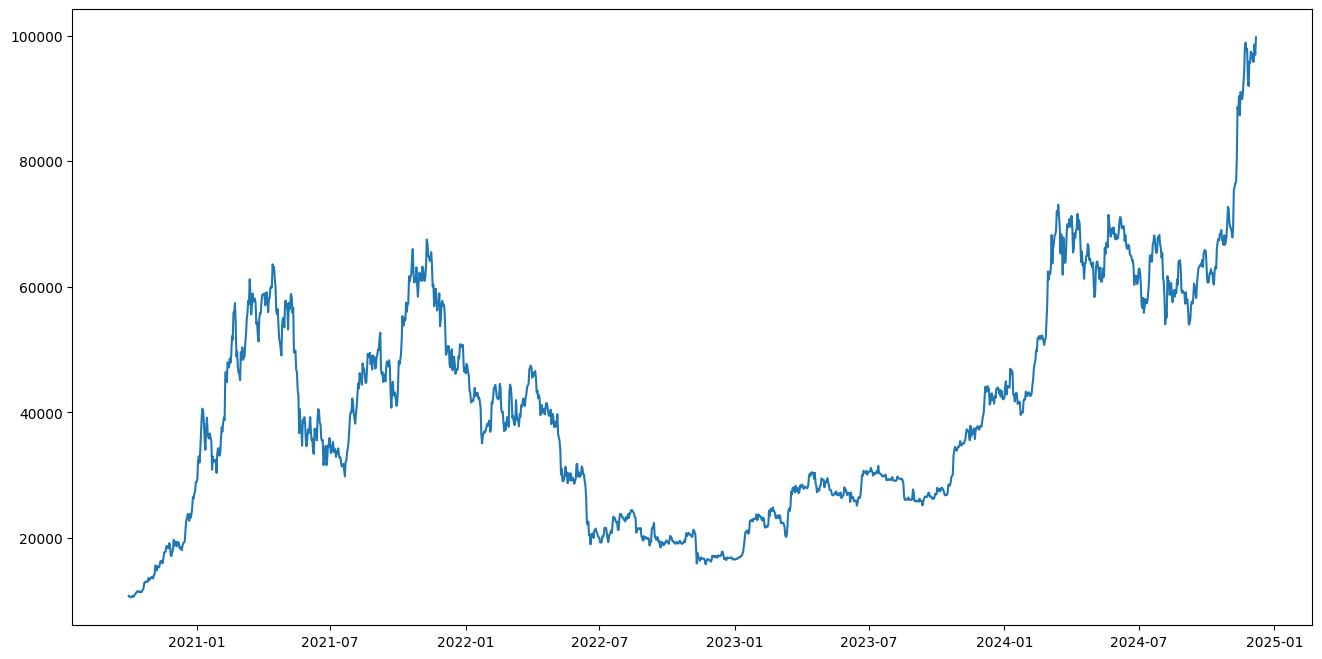

In [122]:
plt.figure(figsize=(16,8))
plt.plot(btcusdt_df['Open_time'], btcusdt_df['Open'])

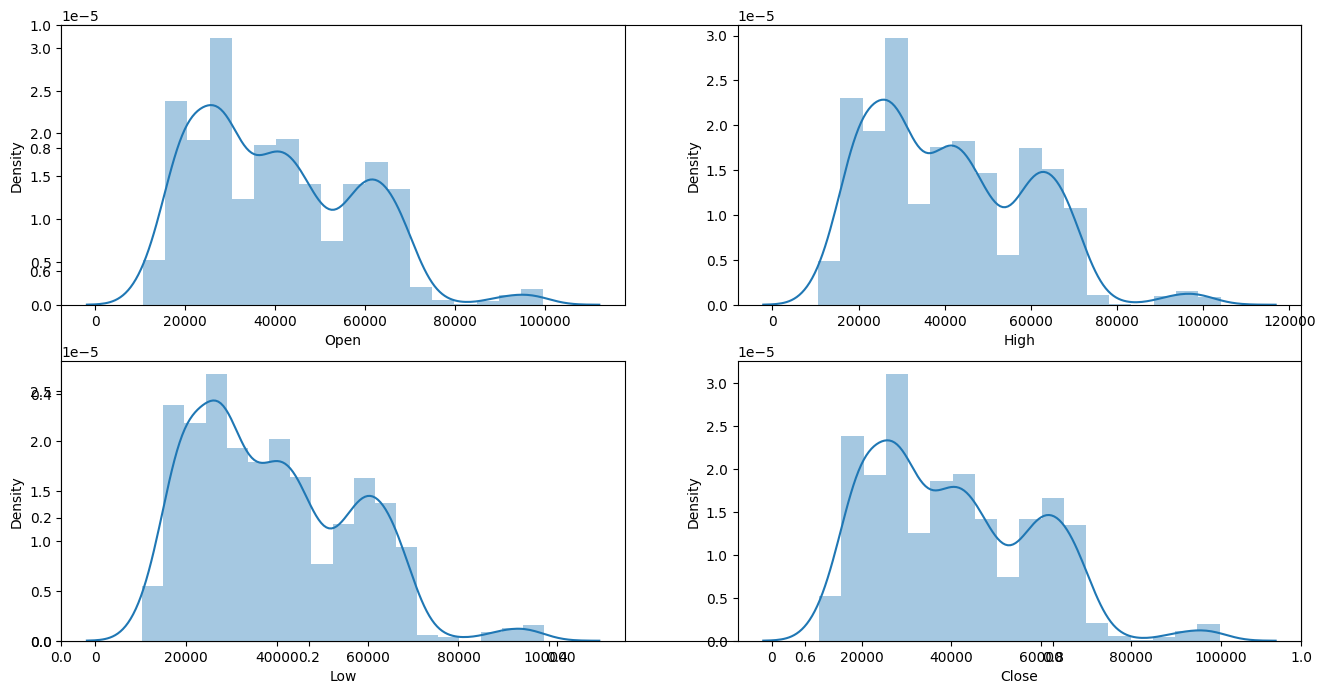

In [123]:
features = ['Open', 'High', 'Low', 'Close']

plt.subplots(figsize=(16,8))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sns.distplot(btcusdt_df[col])
plt.show()

In [124]:
f_feat =['Open','Volume','Quote_asset_volume','Taker_buy_base_asset_volume','Taker_buy_quote_asset_volume']  
df_t = btcusdt_df[f_feat]
df_t=df_t.set_index('Open')
df_t.head(5)

,Volume,Quote_asset_volume,Taker_buy_base_asset_volume,Taker_buy_quote_asset_volume
Open,,,,
10776.59,60866.33,6.521690e+08,28449.98,3.047795e+08
10619.13,50130.39,5.268644e+08,24123.90,2.535077e+08
10570.40,22298.22,2.351609e+08,10752.46,1.133927e+08
10542.07,23212.00,2.462521e+08,12123.28,1.286198e+08
10666.62,34025.76,3.641585e+08,15551.58,1.664575e+08


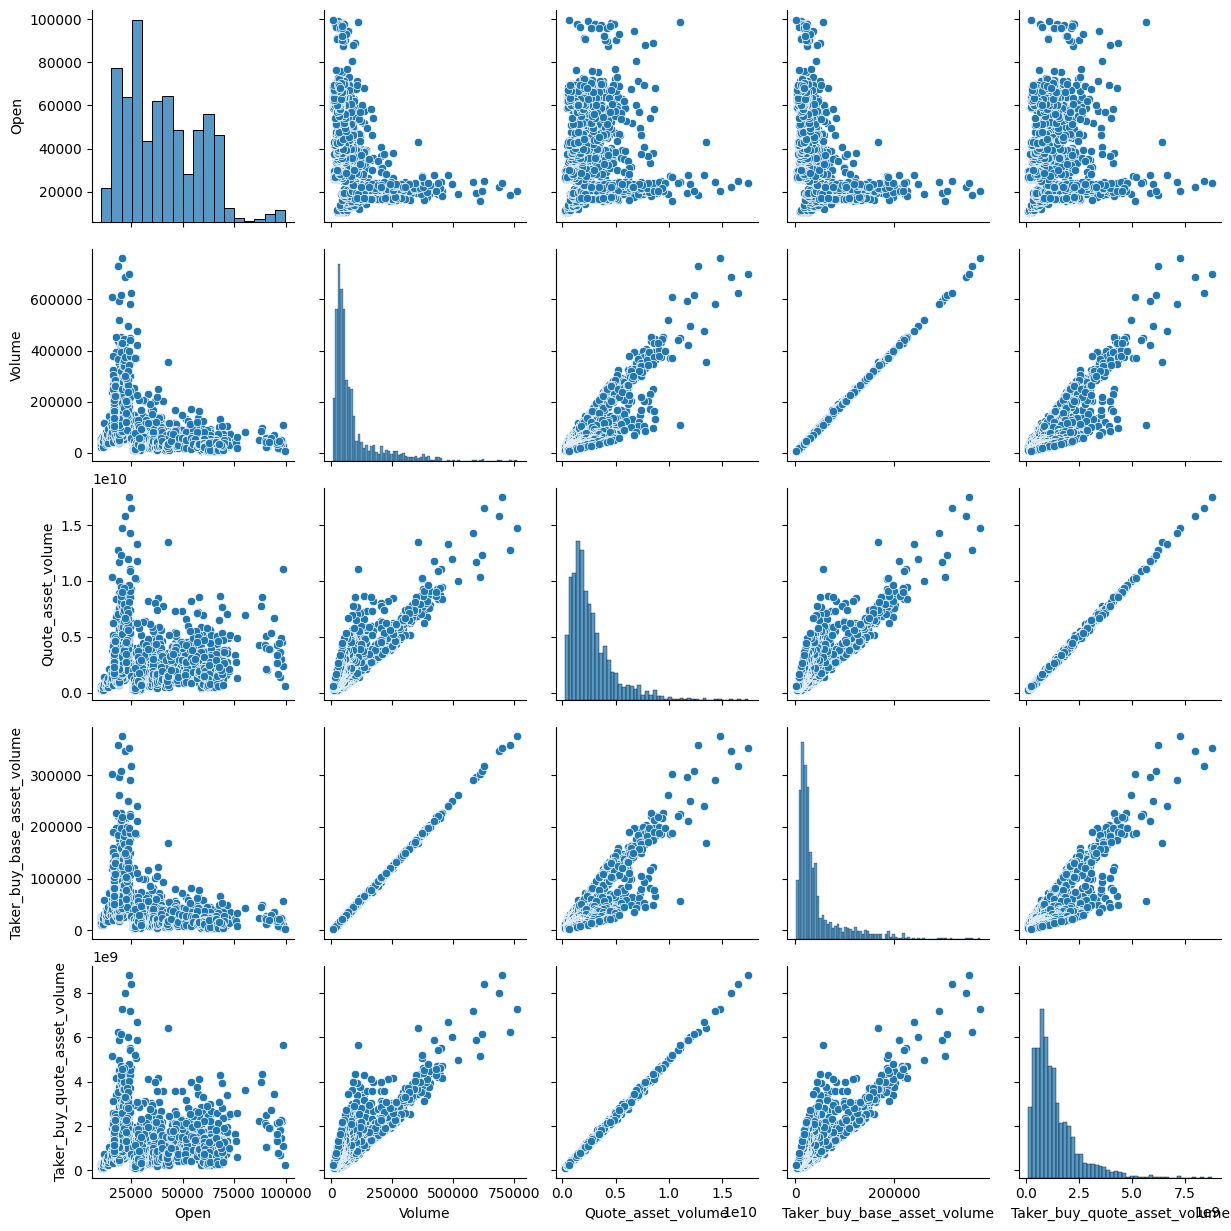

In [125]:
sns.pairplot(btcusdt_df[f_feat])

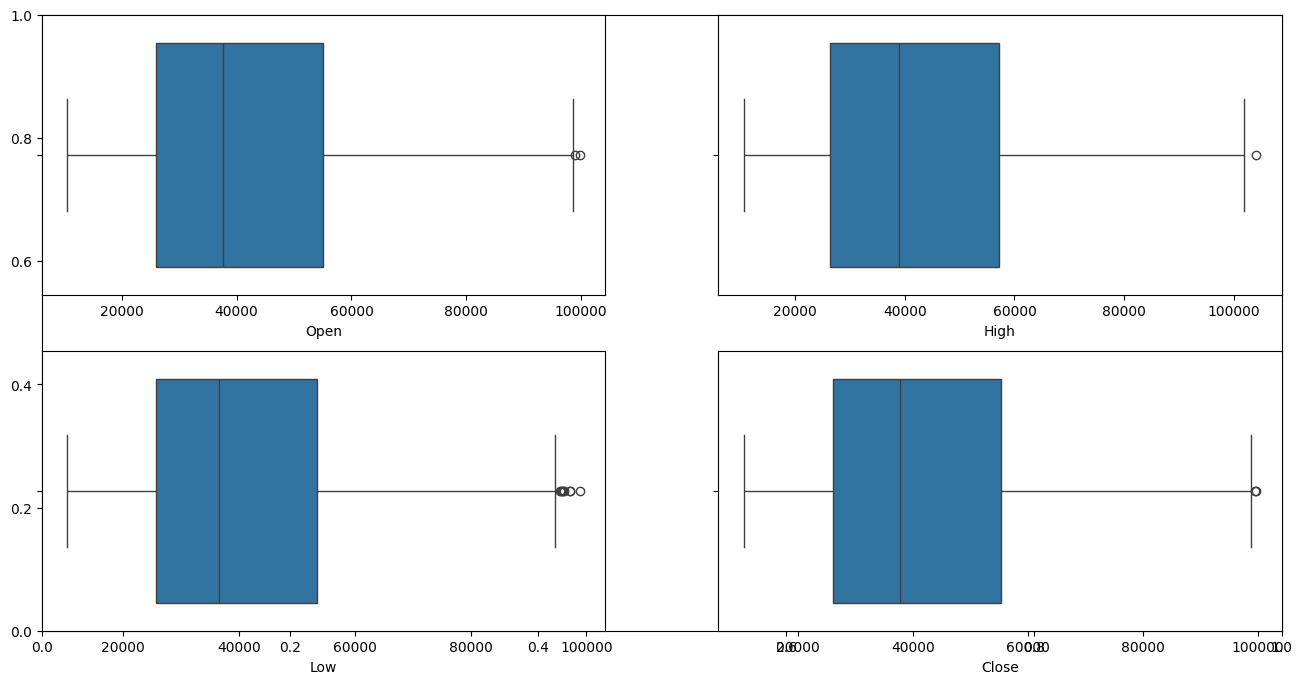

In [126]:
plt.subplots(figsize=(16,8))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sns.boxplot(x=btcusdt_df[col])
plt.show()

__Для наглядности посмотрим скользящие средние (Moving Average, MA)__

In [127]:
def plotMovingAverage(series, n):

    """
    series - dataframe with timeseries
    n - rolling window size 

    """

    rolling_mean = series.rolling(window=n).mean()

    # При желании, можно строить и доверительные интервалы для сглаженных значений
    #rolling_std =  series.rolling(window=n).std()
    #upper_bond = rolling_mean+1.96*rolling_std
    #lower_bond = rolling_mean-1.96*rolling_std

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(n))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    #plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
    #plt.plot(lower_bond, "r--")
    plt.plot(series[n:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

In [128]:
df_feat = ['Open_time','Open']
new_df = btcusdt_df[df_feat].set_index('Open_time')

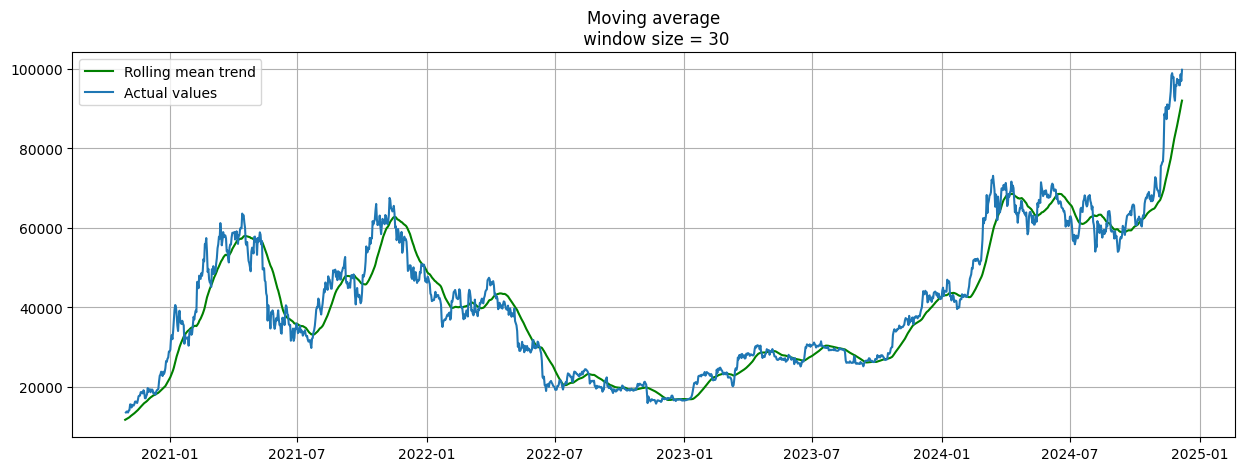

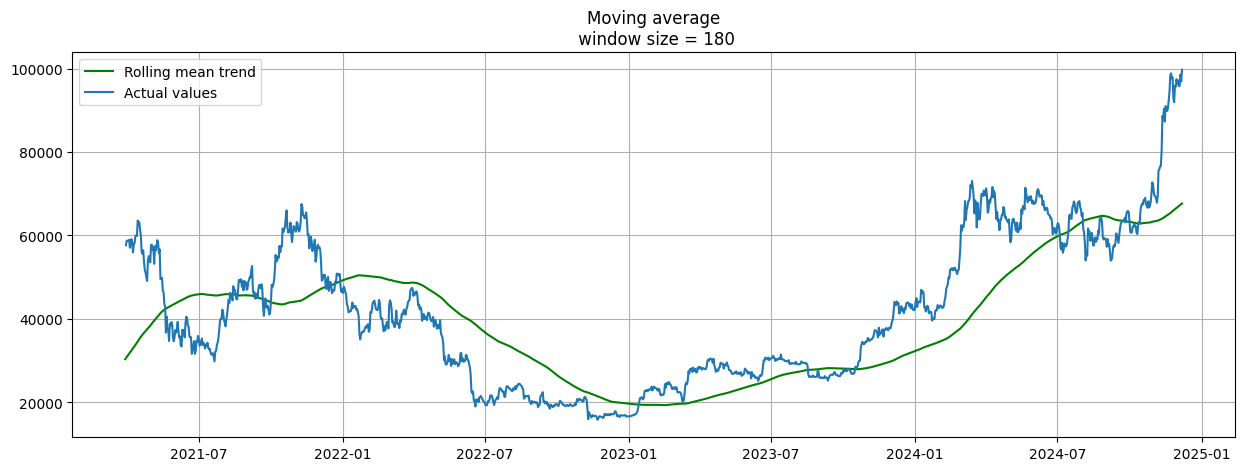

In [129]:
plotMovingAverage(new_df, 30) # сглаживаем по месяцам
plotMovingAverage(new_df, 180) # сглаживаем по полугодиям

MA 180 показывает восходящий тренд начиная с 2023 года

## Преобразование признаков

__Объединим признаки, которые сильно коррелируют между собой.__

In [130]:
btcusdt_df['Vol_base_asset_volume'] = btcusdt_df['Volume'] + btcusdt_df['Taker_buy_base_asset_volume']
btcusdt_df['All_asset_volume'] = btcusdt_df['Quote_asset_volume'] + btcusdt_df['Taker_buy_quote_asset_volume']

In [131]:
btcusdt_df = btcusdt_df.drop(columns=['Volume','Taker_buy_base_asset_volume','Quote_asset_volume','Taker_buy_quote_asset_volume'])

## CatBoost

__Для оценки ошибок прогнозов буду использовать метрики  MSE(средняя квадратическая ошибка), MAE(средняя абсолютная ошибка), MAPE(Средняя абсолютная процентная ошибка).__

In [132]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error  

In [133]:
btcusdt_df.head(2)

,Open_time,Open,High,Low,Close,Close_time,Number_of_trades,Vol_base_asset_volume,All_asset_volume
0,2020-10-01,10776.59,10920.00,10437.0,10619.13,2020-10-01 23:59:59.999000072,794855,89316.31,9.569485e+08
1,2020-10-02,10619.13,10664.64,10374.0,10570.40,2020-10-02 23:59:59.999000072,777193,74254.29,7.803721e+08


In [134]:
new_feat = ['All_asset_volume','Number_of_trades','Vol_base_asset_volume']

In [135]:
btcusdt_df[new_feat].head()

,All_asset_volume,Number_of_trades,Vol_base_asset_volume
0,9.569485e+08,794855,89316.31
1,7.803721e+08,777193,74254.29
2,3.485536e+08,381329,33050.68
3,3.748719e+08,377553,35335.28
4,5.306161e+08,483340,49577.34


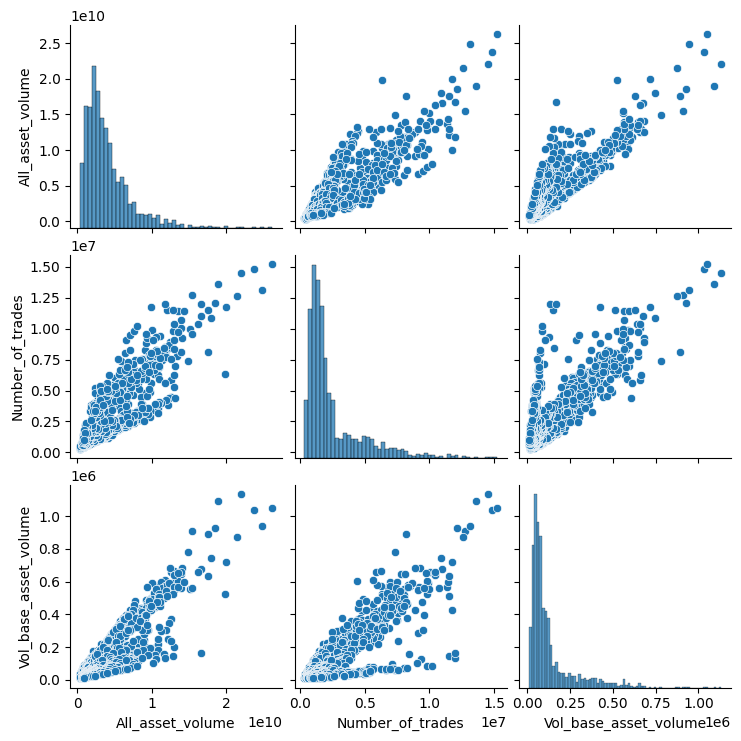

In [136]:
sns.pairplot(btcusdt_df[new_feat])

__Удаляем колонки с ценами__

In [137]:
del_feat = ['High', 'Low', 'Close','Close_time'] 

In [138]:
df_cat = btcusdt_df.drop(columns=del_feat)

In [139]:
df_cat.head(3)

,Open_time,Open,Number_of_trades,Vol_base_asset_volume,All_asset_volume
0,2020-10-01,10776.59,794855,89316.31,9.569485e+08
1,2020-10-02,10619.13,777193,74254.29,7.803721e+08
2,2020-10-03,10570.40,381329,33050.68,3.485536e+08


<Axes: >

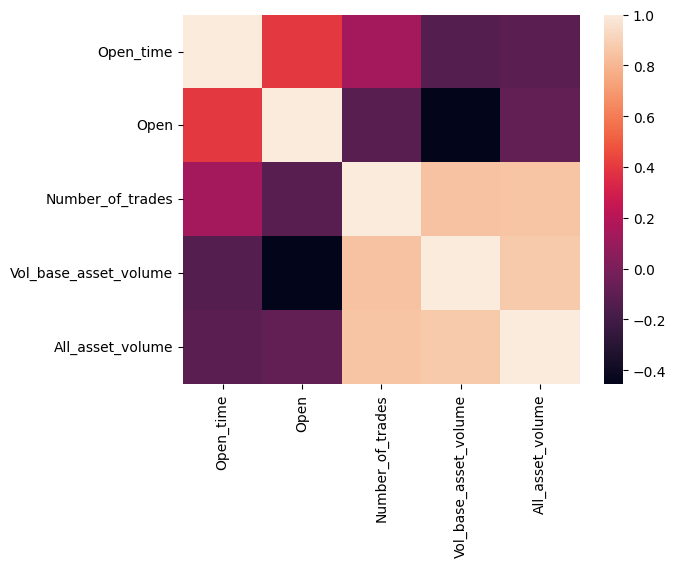

In [140]:
sns.heatmap(df_cat.corr())

Присутствует высокая корреляция признаков.

__Устанавливаем ('Open_time') индексом__

In [141]:
df_cat_index = df_cat.set_index('Open_time')

In [142]:
df_cat_index.head(2)

,Open,Number_of_trades,Vol_base_asset_volume,All_asset_volume
Open_time,,,,
2020-10-01,10776.59,794855,89316.31,9.569485e+08
2020-10-02,10619.13,777193,74254.29,7.803721e+08


__Используем обычную hold-out валидацию.__

In [143]:
cut_index = pd.to_datetime('2024-10-01')    # Ограничили до последнего пампа, финальное предсказание после этой даты.
c_test_start = pd.to_datetime('2024-02-01') # Дата разделяющая тестовый и тренировочный наборы.
c_train = df_cat_index[df_cat_index.index < c_test_start]
c_test = df_cat_index[(df_cat_index.index >= c_test_start) & (df_cat_index.index<cut_index)]
c_pred = df_cat_index[df_cat_index.index>=cut_index]

__Будем использовать в качестве предсказываемой переменной цену открытия ('Open_time')__

In [144]:
X_train = c_train.drop(columns='Open')  # Тренировочный набор
X_test = c_test.drop(columns='Open')    # Тестовый набор
X_pred = c_pred.drop(columns='Open')    # Набор для финального предсказания
y_train = c_train['Open']
y_test = c_test['Open']

__Будем использовать CatBoostRegressor__

In [145]:
cat_model = CatBoostRegressor(random_state=42)

In [146]:
cat_model.fit(X_train, y_train, verbose=0)

In [147]:
cat_pred_simple = cat_model.predict(X_test)

In [148]:
print(f"MAPE = {mean_absolute_percentage_error(y_test, cat_pred_simple)}")
print(f"MAE = {mean_absolute_error(y_test, cat_pred_simple)}")
print(f"MSE = {mean_squared_error(y_test, cat_pred_simple)}")

MAPE = 0.10175728805026274
MAE = 6523.334016449768
MSE = 88723287.54082054


__Тесты с отсечением признаков__

In [149]:
#cut_index = pd.to_datetime('2024-10-01') #Ограничили до последнего пампа
#MAPE = 0.09396548997108423
#MAE = 6041.111951329181
#MSE = 79006591.94190885

# del_feat = ['High', 'Low', 'Close','Close_time'] 
#MAPE = 0.12722348942194042
#MAE = 8979.484040749014
#MSE = 184052001.7690062

#del_feat = ['High', 'Low', 'Close','Close_time','Volume'] 
#MAPE = 0.13132105727541174
#MAE = 9273.365173646307
#MSE = 196279181.8466896

#del_feat = ['High', 'Low', 'Close','Close_time','Volume','Quote_asset_volume'] 
#MAPE = 0.14374180706081857
#MAE = 10111.986902987854
#MSE = 212809747.24907532

#del_feat = ['High', 'Low', 'Close','Close_time','Taker_buy_quote_asset_volume']
#MAPE = 0.13361011413803378
#MAE = 9422.824233737032
#MSE = 194210567.5879117

#del_feat = ['High', 'Low', 'Close','Close_time','Taker_buy_base_asset_volume']
#MAPE = 0.1376753477730816
#MAE = 9689.424654397886
#MSE = 202640167.3552525

#del_feat = ['High', 'Low', 'Close','Close_time','Taker_buy_base_asset_volume','Taker_buy_quote_asset_volume']
#MAPE = 0.14839458360286856
#MAE = 10465.545027805352
#MSE = 233319304.71433097

#del_feat = ['High', 'Low', 'Close','Close_time','Taker_buy_base_asset_volume','Taker_buy_quote_asset_volume','Quote_asset_volume']
#MAPE = 0.36103647621318286
#MAE = 24394.563649987926
#MSE = 805718879.8987602

#del_feat = ['High', 'Low', 'Close','Close_time','Taker_buy_base_asset_volume','Taker_buy_quote_asset_volume','Quote_asset_volume','Volume']
#MAPE = 0.4433604345544722
#MAE = 29865.152418024165
#MSE = 1120001196.473094

#Вывод: отсечение признаков негативно влияет на качество модели.

In [150]:
cat_pred_s = pd.Series(cat_pred_simple, index=y_test.index)

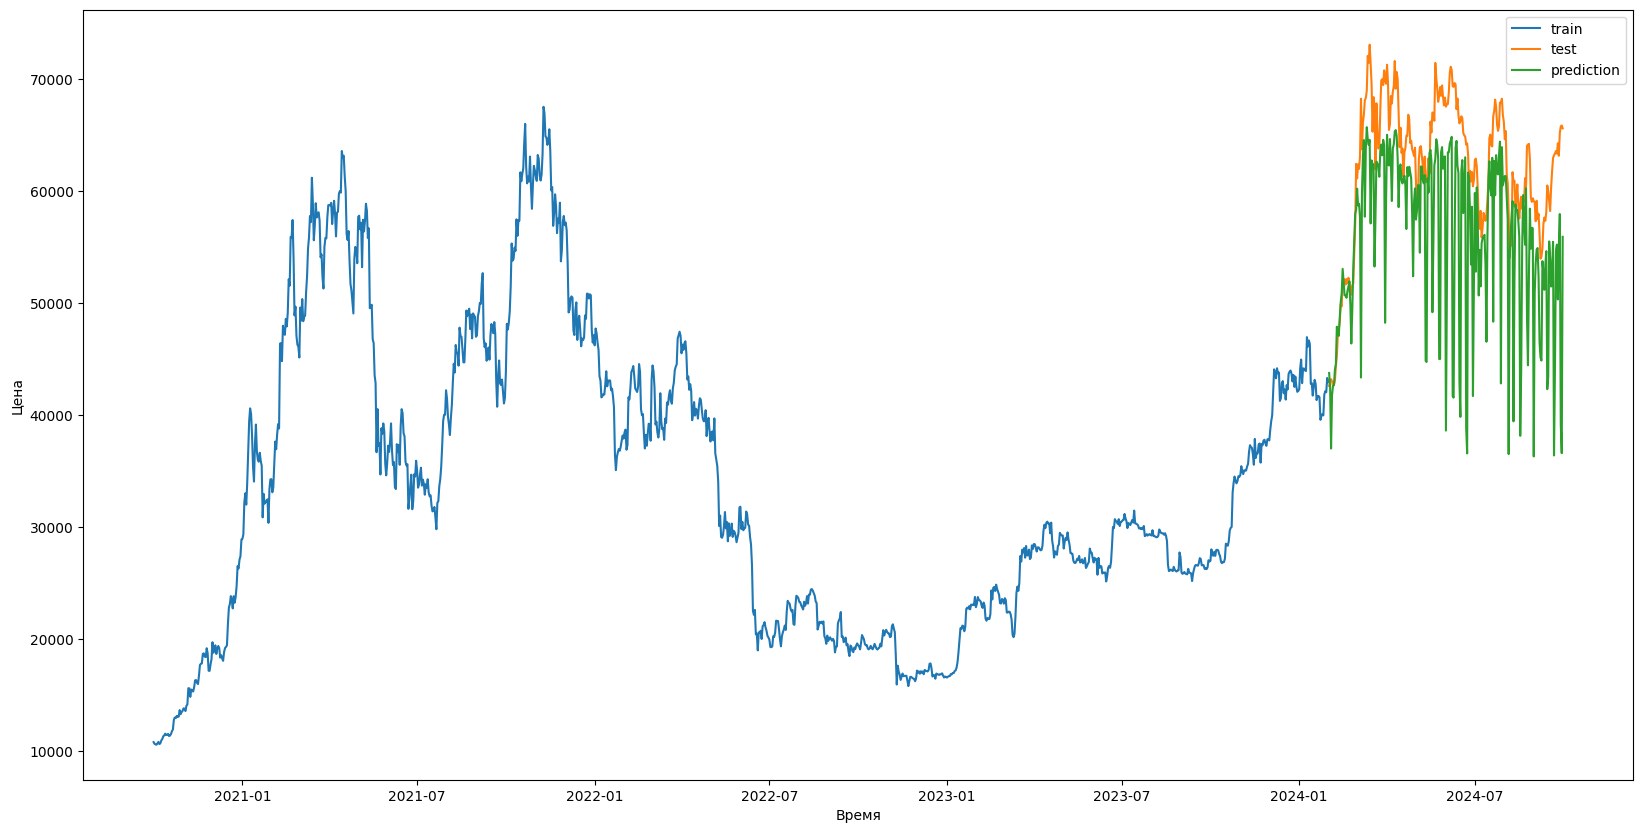

In [151]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.plot(y_train, label='train')
ax.plot(y_test, label='test')
ax.plot(cat_pred_s, label='prediction')
ax.set_xlabel('Время')
ax.set_ylabel('Цена')
plt.legend()
plt.show()

Ошибка существенная, это заметно на графике.

In [152]:
cat_model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,Vol_base_asset_volume,46.346699
1,All_asset_volume,43.810044
2,Number_of_trades,9.843257


### Настройка гиперпараметров

#### fast_model

In [153]:
fast_model = CatBoostRegressor(
    random_seed=63,
    iterations=20000,
    learning_rate=0.01,
    boosting_type='Plain',
    bootstrap_type='Bernoulli',
    subsample=0.5,
    one_hot_max_size=20,
    rsm=0.5,
    leaf_estimation_iterations=5,
    max_ctr_complexity=1
)

fast_model.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [154]:
fast_model.best_score_

{'learn': {'RMSE': 451.03316039681874},
 'validation': {'RMSE': 7920.182985327238}}

In [155]:
fast_model.get_params()

{'iterations': 20000,
 'learning_rate': 0.01,
 'rsm': 0.5,
 'loss_function': 'RMSE',
 'leaf_estimation_iterations': 5,
 'random_seed': 63,
 'max_ctr_complexity': 1,
 'one_hot_max_size': 20,
 'boosting_type': 'Plain',
 'bootstrap_type': 'Bernoulli',
 'subsample': 0.5}

#### tunned_model

In [156]:
tunned_model = CatBoostRegressor(
    random_seed=63,
    iterations=15000,
    learning_rate=0.03,
    l2_leaf_reg=3,
    bagging_temperature=1,
    random_strength=1,
    one_hot_max_size=2,
    leaf_estimation_method='Newton' 
)

tunned_model.fit(
    X_train, y_train,
    verbose=False,
    eval_set=(X_test, y_test),
    plot=True

)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [157]:
tunned_model.tree_count_

14939

__Переобучение наступает на 14939 итерации.__

In [158]:
tunned_model.best_score_

{'learn': {'RMSE': 149.76590411253235},
 'validation': {'RMSE': 8772.55369699759}}

#### best_model

In [159]:
best_model = CatBoostRegressor(
    random_seed=63,
    iterations=int(tunned_model.tree_count_ * 1.1),
)

best_model.fit(
    X_train, y_train,
    verbose=0
)

In [160]:
best_model.get_params()

{'iterations': 16432, 'loss_function': 'RMSE', 'random_seed': 63}

In [161]:
best_model.best_score_

{'learn': {'RMSE': 516.4726036274093}}

In [162]:
cat_pred3 = best_model.predict(X_test)

In [163]:
print(f"MAPE = {mean_absolute_percentage_error(y_test, cat_pred3)}")
print(f"MAE = {mean_absolute_error(y_test, cat_pred3)}")
print(f"MSE = {mean_squared_error(y_test, cat_pred3)}")

MAPE = 0.09910343028579241
MAE = 6348.442656651747
MSE = 83520000.31454006


In [164]:
cat_pred3_s = pd.Series(cat_pred3, index=y_test.index)

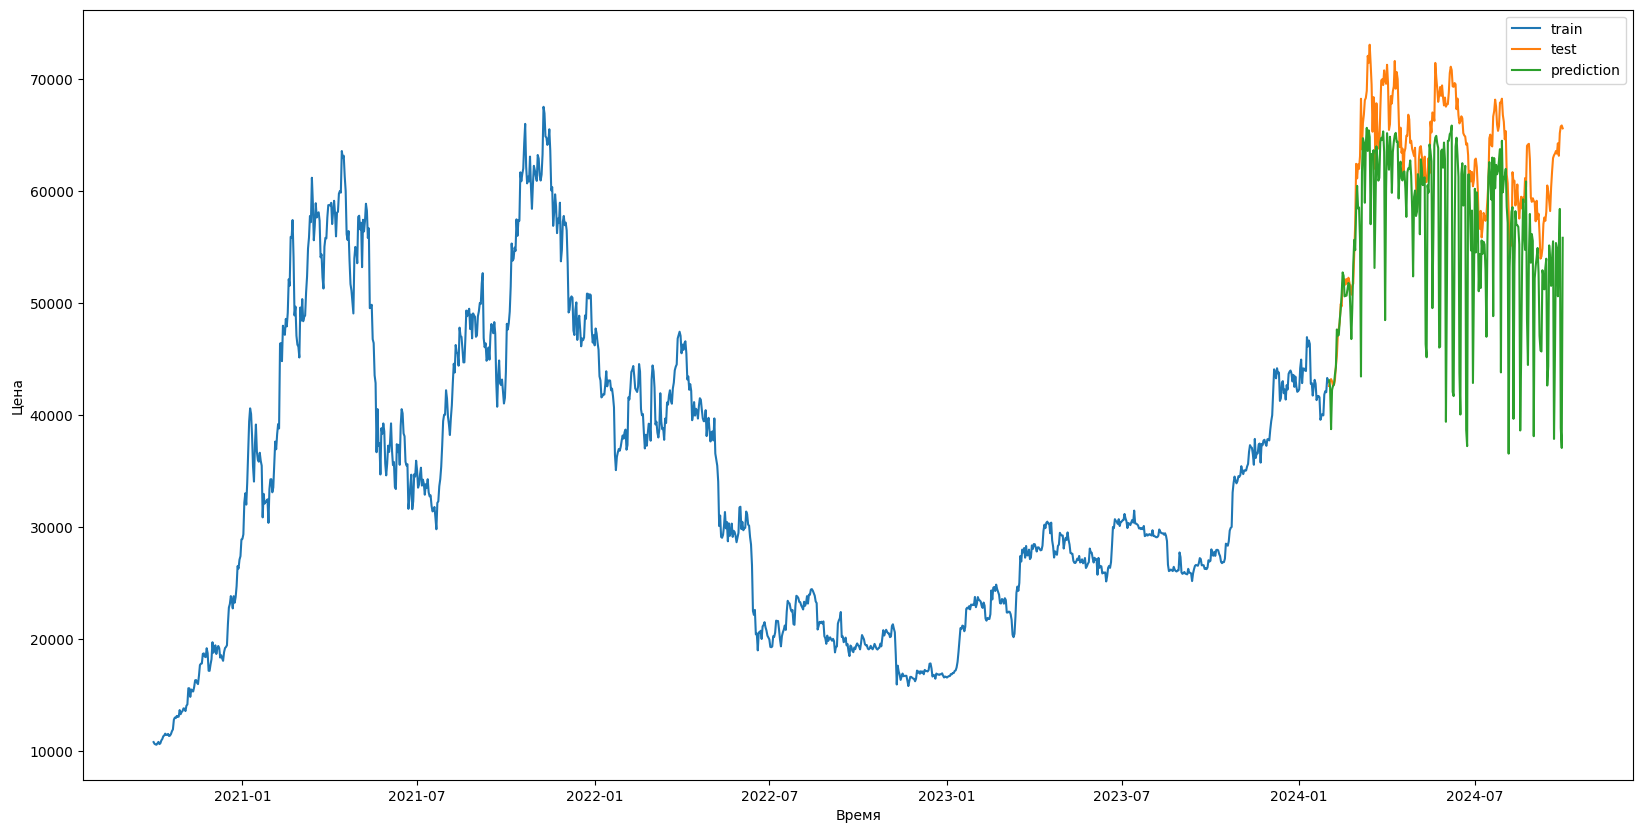

In [165]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.plot(y_train, label='train')
ax.plot(y_test, label='test')
ax.plot(cat_pred3_s, label='prediction')
ax.set_xlabel('Время')
ax.set_ylabel('Цена')
plt.legend()
plt.show()

__Для оптимизации гиперпараметров будем использовать optuna.__

In [166]:
import optuna
from optuna.samplers import TPESampler
from catboost.utils import eval_metric


def objective(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.1, 1),
        'depth': trial.suggest_int('depth', 2, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'boosting_type': trial.suggest_categorical('boosting_type', ['Ordered', 'Plain']),
    }

    model_o = CatBoostRegressor(**params, random_seed=42)
    model_o.fit(X_train,y_train, verbose=0) #eval_set
    y_pred = model_o.predict(X_test)
    return mean_absolute_error(y_test, y_pred)

sampler = TPESampler(seed=123)
study = optuna.create_study(direction='maximize', sampler=sampler)
study.optimize(objective, n_trials=30)

[I 2024-12-07 13:04:20,509] A new study created in memory with name: no-name-a69bbbf0-18f9-4c65-ad6f-5a9a466b1599
[I 2024-12-07 13:04:21,131] Trial 0 finished with value: 4582.859330508818 and parameters: {'learning_rate': 0.7268222670380755, 'depth': 4, 'l2_leaf_reg': 3.041663082077828, 'boosting_type': 'Plain'}. Best is trial 0 with value: 4582.859330508818.
[I 2024-12-07 13:05:07,689] Trial 1 finished with value: 8170.2103759595575 and parameters: {'learning_rate': 0.4807958141120149, 'depth': 10, 'l2_leaf_reg': 7.1634676472637695, 'boosting_type': 'Ordered'}. Best is trial 1 with value: 8170.2103759595575.
[I 2024-12-07 13:05:10,046] Trial 2 finished with value: 8832.23726049942 and parameters: {'learning_rate': 0.4088602145357825, 'depth': 8, 'l2_leaf_reg': 4.947150202116619, 'boosting_type': 'Plain'}. Best is trial 2 with value: 8832.23726049942.
[I 2024-12-07 13:05:10,549] Trial 3 finished with value: 3903.2900113621736 and parameters: {'learning_rate': 0.7641958651588321, 'dept

In [167]:
best_params = {'learning_rate': 0.7641958651588321, 'depth': 3, 'l2_leaf_reg': 2.5790658053274327, 'boosting_type': 'Plain', 'n_estimators':14000}

In [168]:
cat_model_optuna = CatBoostRegressor(**best_params)

In [169]:
cat_model_optuna.fit(X_train, y_train, verbose=0)

In [170]:
pred_optuna = cat_model_optuna.predict(X_test)

In [171]:
print(f"MAPE = {mean_absolute_percentage_error(y_test, pred_optuna)}")
print(f"MAE = {mean_absolute_error(y_test, pred_optuna)}")
print(f"MSE = {mean_squared_error(y_test, pred_optuna)}")

MAPE = 0.06256890888901785
MAE = 3975.0664619142985
MSE = 37331465.80360604


In [172]:
pred_optuna_s = pd.Series(pred_optuna, index=y_test.index) # Преобразуем в серию

__Предсказываем финальный отрезок после '2024-10-01'.__

In [173]:
pred_optuna_final = cat_model_optuna.predict(X_pred)

In [174]:
pred_optuna_final_s = pd.Series(pred_optuna_final, index=c_pred.index)

In [175]:
y_pred_optuna_final = pd.Series(c_pred['Open'])

In [176]:
print(f"MAPE = {mean_absolute_percentage_error(y_pred_optuna_final, pred_optuna_final)}")
print(f"MAE = {mean_absolute_error(y_pred_optuna_final, pred_optuna_final)}")
print(f"MSE = {mean_squared_error(y_pred_optuna_final, pred_optuna_final)}")

MAPE = 0.11858611800075532
MAE = 9698.385218391848
MSE = 179768665.53246966


Здесь ошибки больше.

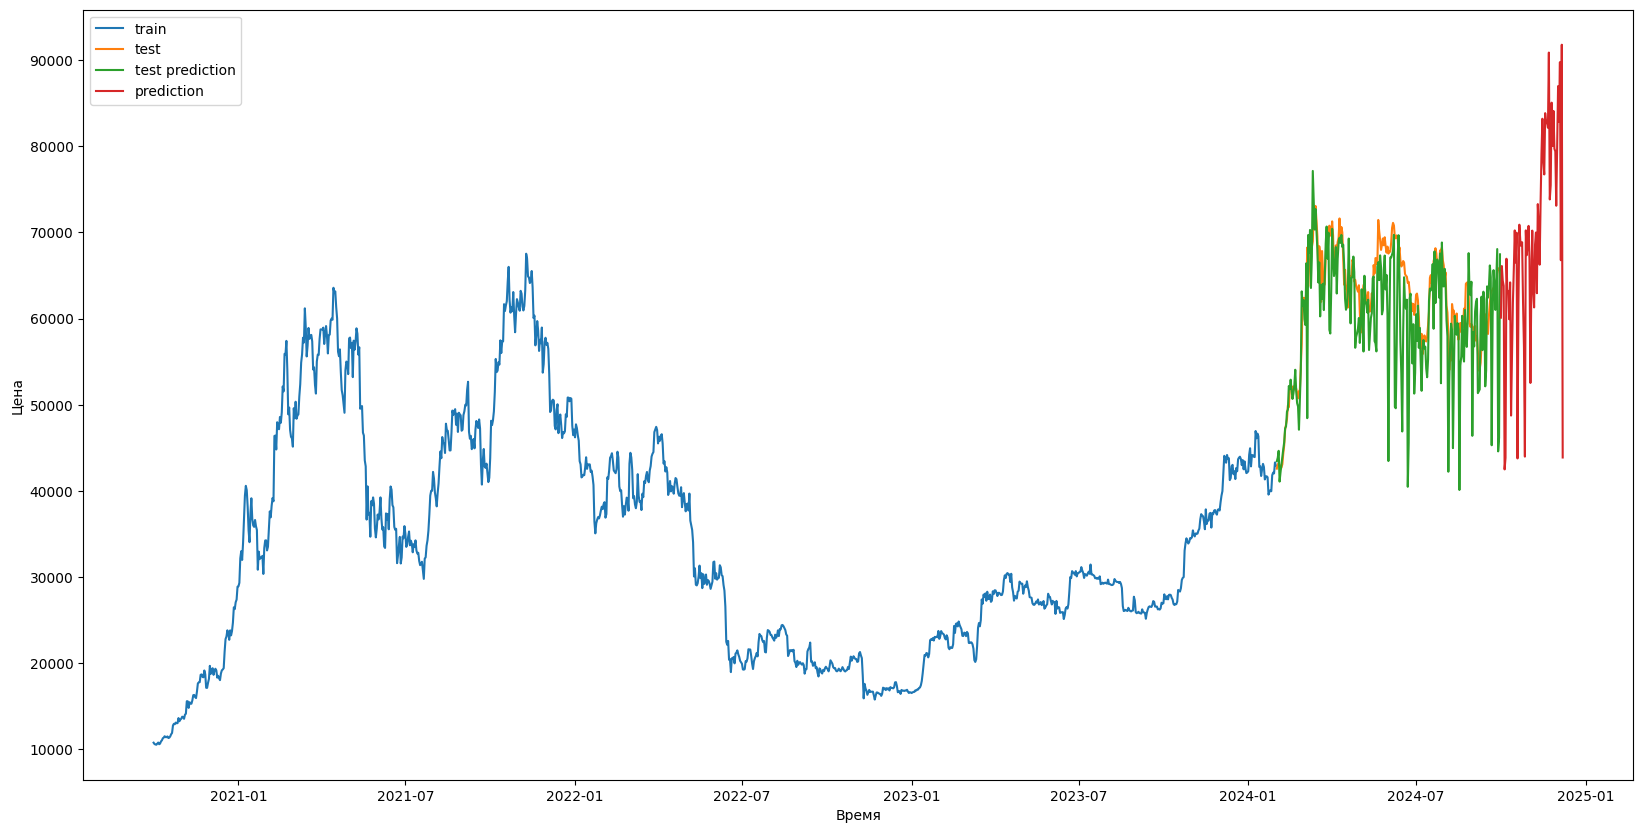

In [177]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))
ax.plot(y_train, label='train')
ax.plot(y_test, label='test')
ax.plot(pred_optuna_s, label='test prediction')
ax.plot(pred_optuna_final_s, label='prediction')
ax.set_xlabel('Время')
ax.set_ylabel('Цена')
plt.legend()
plt.show()

__Методом 'ручного' подбора были подкорректированы гиперпараметры__

In [178]:
corr_params = {'iterations': 14000,
 'learning_rate': 0.8,
 'depth': 2,
 'loss_function': 'RMSE',
 'random_seed': 63,
 'l2_leaf_reg': 5
              }

In [179]:
cat_model_corr = CatBoostRegressor(**corr_params)

In [180]:
cat_model_corr.fit(X_train, y_train, verbose=0)

In [181]:
pred_test_corr = cat_model_corr.predict(X_test)

In [182]:
pred_test_corr_s = pd.Series(pred_test_corr, index=y_test.index)

In [183]:
print(f"MAPE = {mean_absolute_percentage_error(y_test, pred_test_corr_s)}")
print(f"MAE = {mean_absolute_error(y_test, pred_test_corr_s)}")
print(f"MSE = {mean_squared_error(y_test, pred_test_corr_s)}")

MAPE = 0.044635310195669735
MAE = 2834.970425307928
MSE = 22761005.649530236


__Предсказываем финальный отрезок после '2024-10-01'.__

In [184]:
pred_test_corr_f = cat_model_corr.predict(X_pred)

In [185]:
pred_test_corr_f_s = pd.Series(pred_test_corr_f, index=c_pred.index)

In [186]:
print(f"MAPE = {mean_absolute_percentage_error(y_pred_optuna_final, pred_test_corr_f)}")
print(f"MAE = {mean_absolute_error(y_pred_optuna_final, pred_test_corr_f)}")
print(f"MSE = {mean_squared_error(y_pred_optuna_final, pred_test_corr_f)}")

MAPE = 0.07745227009470562
MAE = 6220.043304638526
MSE = 99080763.86995634


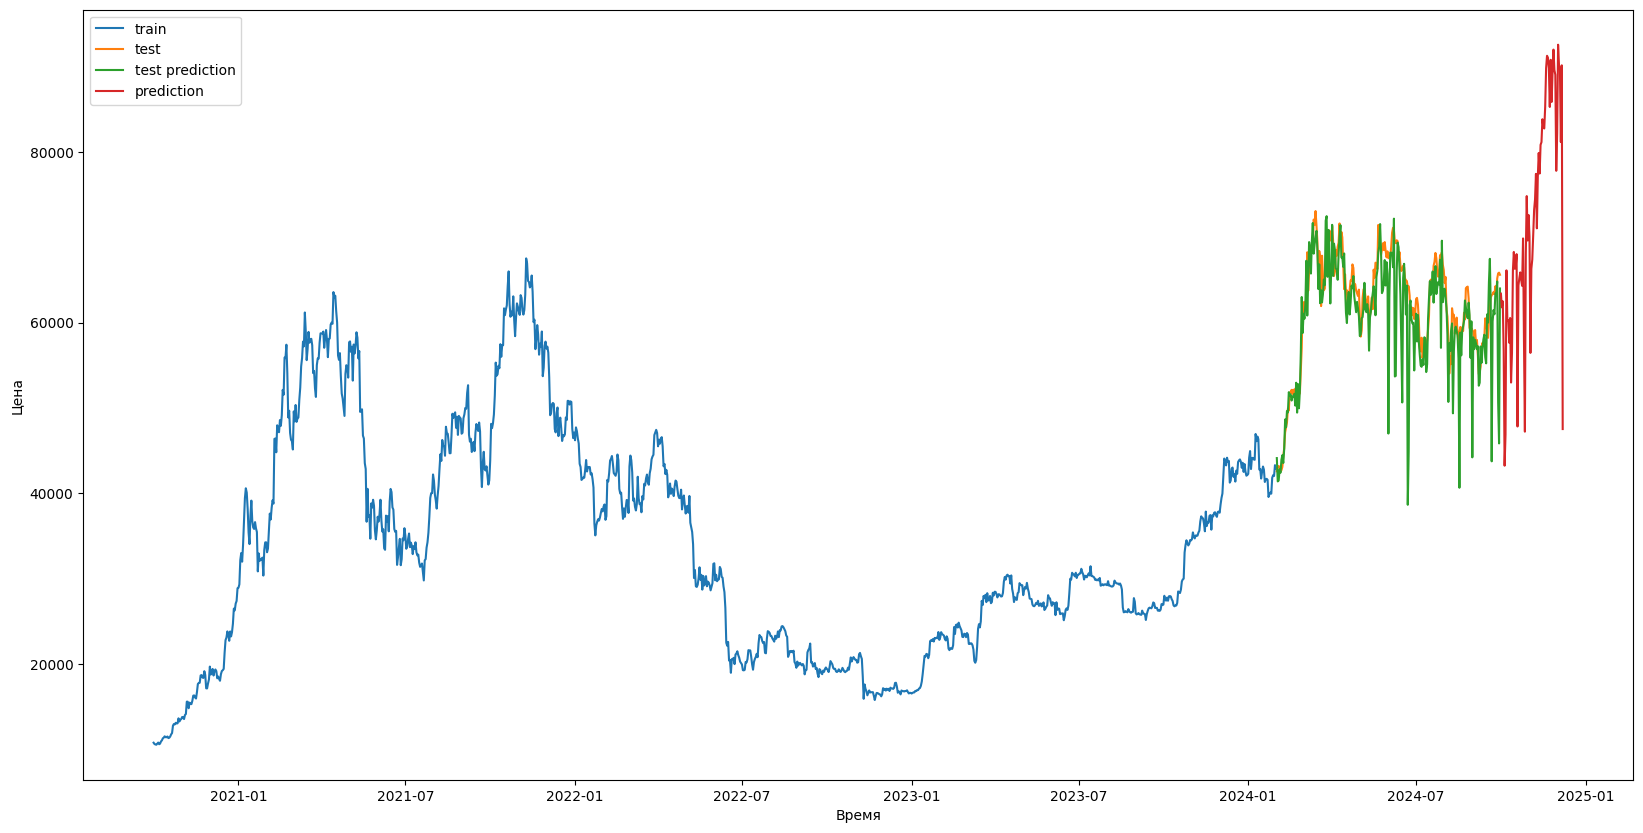

In [187]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))
ax.plot(y_train, label='train')
ax.plot(y_test, label='test')
ax.plot(pred_test_corr_s, label='test prediction')
ax.plot(pred_test_corr_f_s, label='prediction')
ax.set_xlabel('Время')
ax.set_ylabel('Цена')
plt.legend()
plt.show()

In [188]:
cat_model_corr.get_feature_importance(prettified=True)

,Feature Id,Importances
0,All_asset_volume,40.194900
1,Vol_base_asset_volume,33.044724
2,Number_of_trades,26.760375


## Вывод.

In [189]:
def plotMovingAverage_Conf_interval (series, n):

    """
    series - dataframe with timeseries
    n - rolling window size 

    """

    rolling_mean = series.rolling(window=n).mean()

    #доверительные интервалы для сглаженных значений
    rolling_std =  series.rolling(window=n).std()
    upper_bond = rolling_mean+1.96*rolling_std
    lower_bond = rolling_mean-1.96*rolling_std

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(n))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
    plt.plot(lower_bond, "r--")
    plt.plot(series[n:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

__Объединим тренировочные значения и предсказанные__

In [190]:
pred_df = pd.concat([y_train,pred_test_corr_s,pred_test_corr_f_s], axis=0)

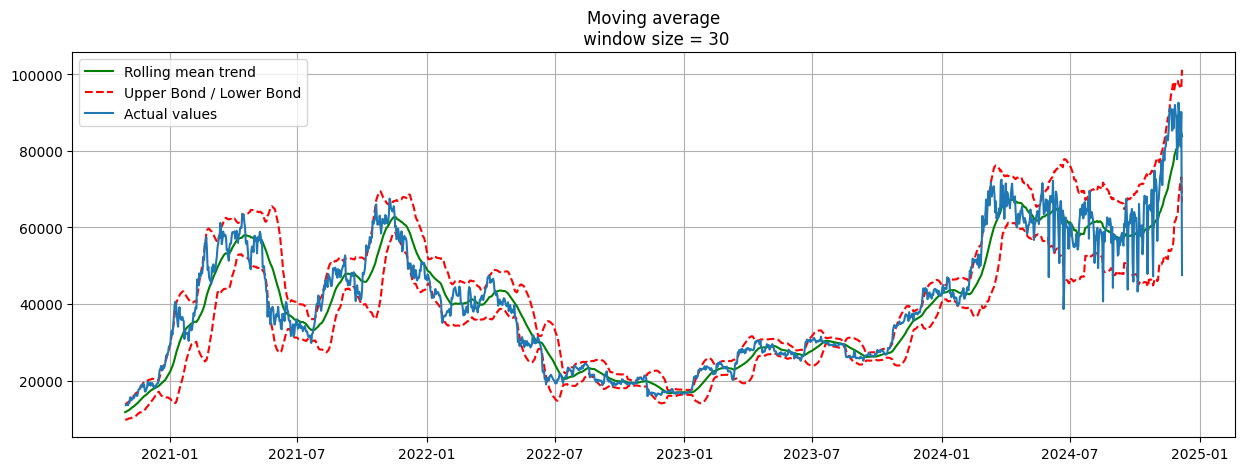

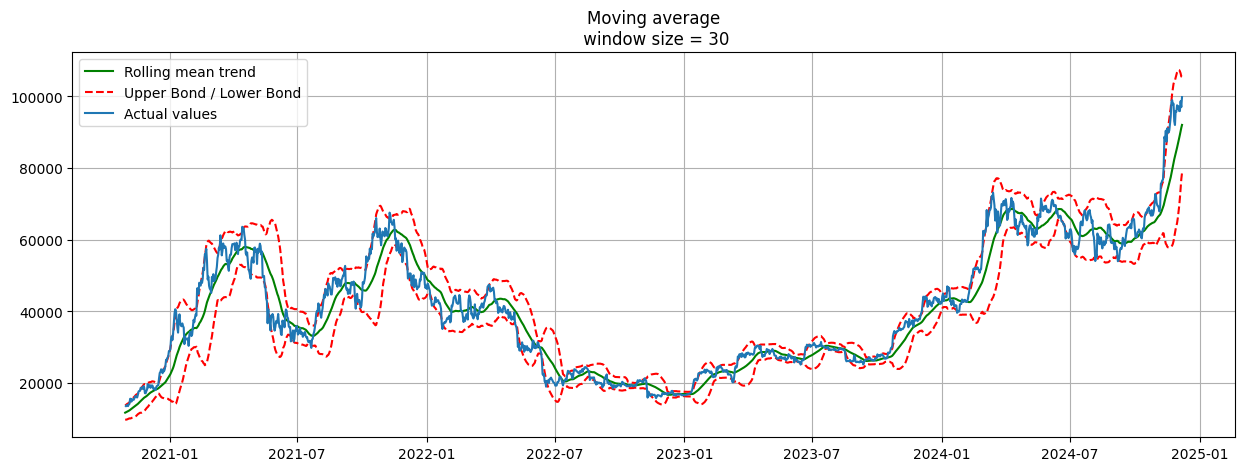

In [191]:
plotMovingAverage_Conf_interval(pred_df, 30)
plotMovingAverage_Conf_interval(new_df, 30)

Как видно из графиков при сглаживании по месяцам доверительный интервал на предсказанных значениях заметно увеличивается.

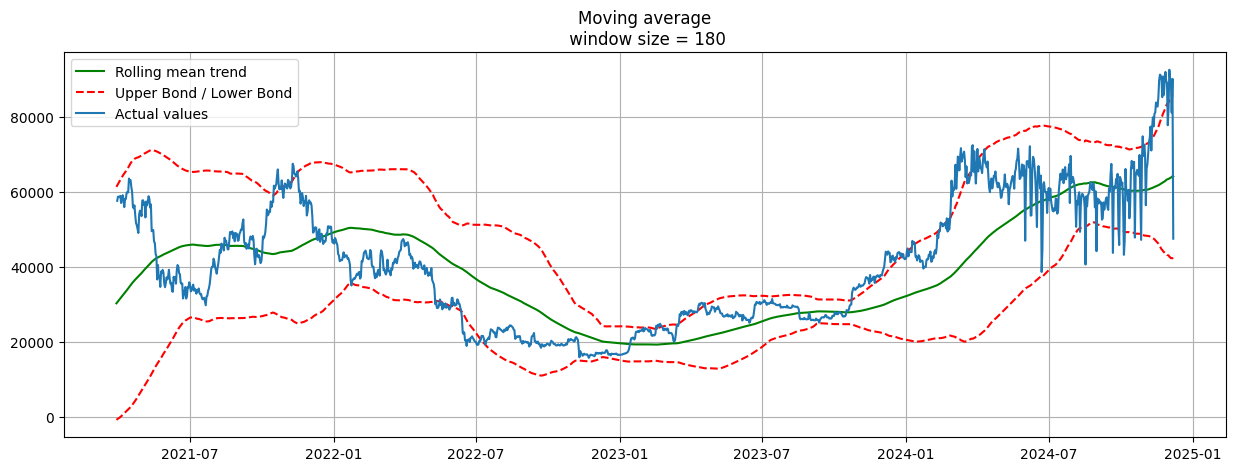

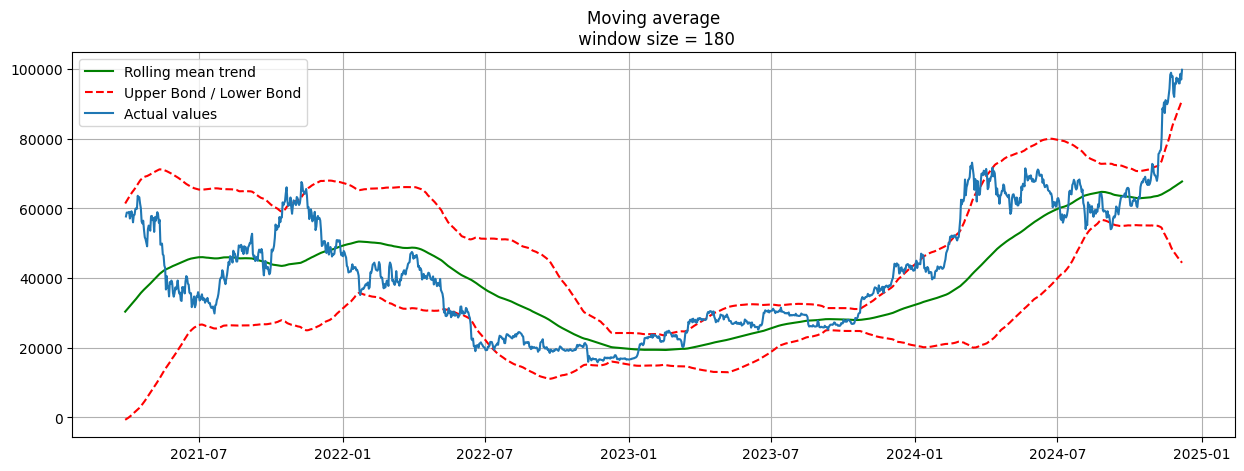

In [192]:
plotMovingAverage_Conf_interval(pred_df, 180)
plotMovingAverage_Conf_interval(new_df, 180)

При сглаживании по полугодиям доверительный интервал изменяется несущественно.
Так же можно сделать вывод о влиянии признака "Number_of_trades" (количество сделок за определённое время). Количество сделок не оказывает сильного влияния на цену, т.к. сильные движения цены осуществляются преимущественно за счёт крупных "игроков".